In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from qutip import *
import scipy.optimize
from matplotlib import pyplot as plt

import cavity_qed_systems
import pulse
import cmps_utils
import tncontract as tn
import parameterized_pulse as ppulse

In [2]:
def optimize_overlap(state, target_mps, pulse):
    """Right now we assume that there is only one pulse."""
    def _obj_fun(x):
        pulse.update(x)
        olap = np.abs(state.get_inner_product(target_mps, [pulse]))**2
        print("Current overlap = ", olap)
        return -olap
    
    def _gradient(x):
        pulse.update(x)
        inner_prod = state.get_inner_product(target_mps, [pulse])
        grad_inner_prod = state.get_inner_prod_gradient(
            target_mps, [pulse])[0]
        grad = -2 * pulse.get_gradient(state.times) @ np.real(
            grad_inner_prod * np.conj(inner_prod))
        #print(np.shape(grad))
        return grad.astype(float)

    print(pulse.bounds())
    print(np.shape(pulse.state()))
    scipy.optimize.minimize(
        _obj_fun, pulse.state(), bounds=pulse.bounds(),jac=_gradient, method="L-BFGS-B") # jac=_gradient,

[[-1.  1.]
 [-1.  1.]
 [-1.  1.]
 ...
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]]
(501,)
Current overlap =  0.0001477049474378836


<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.00014776431149616514
Current overlap =  0.00014782368877166294
Current overlap =  0.00014806126448032295
Current overlap =  0.00014901262899176266
Current overlap =  0.00015283481635300673
Current overlap =  0.00016837485542264455
Current overlap =  0.00017689448426013989
Current overlap =  0.00017695905282641717
Current overlap =  0.0001772173842921464
Current overlap =  0.00017825162121919215
Current overlap =  0.0001824028810607686
Current overlap =  0.00019470384747247757
Current overlap =  0.00019477127252921715
Current overlap =  0.0001950410248214019
Current overlap =  0.00019612086284710685
Current overlap =  0.00020045320916375743
Current overlap =  0.00021205597712964513
Current overlap =  0.0002121254349907704
Current overlap =  0.00021240331329512384
Current overlap =  0.00021351557217795763
Current overlap =  0.00021797627693152729
Current overlap =  0.00023598919623800925
Current overlap =  0.00026674410344413354
Current overlap =  0.00026681880536455

Current overlap =  0.0052237421251397805
Current overlap =  0.0053014665723786466
Current overlap =  0.005310641799955086
Current overlap =  0.005347492613051327
Current overlap =  0.005439714317096511
Current overlap =  0.005449345713392297
Current overlap =  0.005488031699142248
Current overlap =  0.0056453624451018435
Current overlap =  0.005862696075247723
Current overlap =  0.005873738150176269
Current overlap =  0.005918100004530178
Current overlap =  0.006014528621329098
Current overlap =  0.0060259770224983045
Current overlap =  0.006041129101630319
Current overlap =  0.00605263532289095
Current overlap =  0.0060988626411068
Current overlap =  0.006114550114411324
Current overlap =  0.00612626150871019
Current overlap =  0.006151889766528946
Current overlap =  0.006163672665718906
Current overlap =  0.006211012910521619
Current overlap =  0.00621672546387876
Current overlap =  0.006228657787260719
Current overlap =  0.006276599109953965
Current overlap =  0.006425562520738252
C

Current overlap =  0.127342657468464
Current overlap =  0.1324456510400882
Current overlap =  0.13338707817499332
Current overlap =  0.1349732160475261
Current overlap =  0.13541776143244283
Current overlap =  0.13651975657797996
Current overlap =  0.13692304361915295
Current overlap =  0.1378254047017542
Current overlap =  0.13804574917249743
Current overlap =  0.13833644080422722
Current overlap =  0.13896369034044698
Current overlap =  0.13909498151622804
Current overlap =  0.13935052825645072
Current overlap =  0.1394435443760888
Current overlap =  0.13973965814855244
Current overlap =  0.13994463460431572
Current overlap =  0.14012201719881784
Current overlap =  0.14037223331609988
Current overlap =  0.14049222505549627
Current overlap =  0.14058270689751293
Current overlap =  0.14072778838538474
Current overlap =  0.14078985826579835
Current overlap =  0.140830891031319
Current overlap =  0.14095670234943944
Current overlap =  0.1411157115440967
Current overlap =  0.1411544525953

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.0005326272938048547
Current overlap =  0.0005326487588241802
Current overlap =  0.0005327346474356964
Current overlap =  0.000533078658230492
Current overlap =  0.000534461990248069
Current overlap =  0.0005389101827932027
Current overlap =  0.0005389333784126988
Current overlap =  0.0005390261974159971
Current overlap =  0.0005393980576084602
Current overlap =  0.0005402959811602053
Current overlap =  0.000540319452147397
Current overlap =  0.0005404133734798356
Current overlap =  0.0005407896567226264
Current overlap =  0.000542304341769016
Current overlap =  0.0005485149786798826
Current overlap =  0.0005643835307581152
Current overlap =  0.0005644152495899168
Current overlap =  0.0005645421948657939
Current overlap =  0.0005650510947596333
Current overlap =  0.0005671045700375708
Current overlap =  0.0005696800053466914
Current overlap =  0.0005697139859253592
Current overlap =  0.0005698499864623818
Current overlap =  0.0005703952397266671
Current overlap =  0

Current overlap =  0.002442218107876963
Current overlap =  0.0024441882224360088
Current overlap =  0.0024520713906330607
Current overlap =  0.0024595405720742227
Current overlap =  0.0024600328147252244
Current overlap =  0.0024620019480982897
Current overlap =  0.0024698810600705177
Current overlap =  0.0025014371142810304
Current overlap =  0.0025797895482344707
Current overlap =  0.002580288751196737
Current overlap =  0.0025822856967271514
Current overlap =  0.002590275592671095
Current overlap =  0.0026222673959925215
Current overlap =  0.0027506485359442365
Current overlap =  0.0029097644511182725
Current overlap =  0.0029102720646301664
Current overlap =  0.002912302591715881
Current overlap =  0.002920425846562258
Current overlap =  0.002952935798038928
Current overlap =  0.0029837818596075293
Current overlap =  0.0029842911905115866
Current overlap =  0.002986328574047626
Current overlap =  0.0029944790452663514
Current overlap =  0.003011975253917454
Current overlap =  0.003

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.0028856217387884316
Current overlap =  0.0029052505070520586
Current overlap =  0.0029851984792450613
Current overlap =  0.0033278183630993
Current overlap =  0.0033867671015426017
Current overlap =  0.003413602687530438
Current overlap =  0.003522883735017128
Current overlap =  0.003990823271906562
Current overlap =  0.0063396655698270184
Current overlap =  0.006679375838425983
Current overlap =  0.0067517605060926035
Current overlap =  0.006861520935444934
Current overlap =  0.00693625228945615
Current overlap =  0.007239946416225439
Current overlap =  0.008529136562505474
Current overlap =  0.00932732586626658
Current overlap =  0.009431037479967718
Current overlap =  0.009499626964326264
Current overlap =  0.009605200447938196
Current overlap =  0.01003335429429874
Current overlap =  0.011835923498398473
Current overlap =  0.015504581630476374
Current overlap =  0.015666143764020472
Current overlap =  0.01566721844163472
Current overlap =  0.015829438187215092


Current overlap =  0.2292218142343183
Current overlap =  0.2294143276043486
Current overlap =  0.22942679525183932
Current overlap =  0.22942826377792622
Current overlap =  0.22942851494312458
Current overlap =  0.229428562996103
Current overlap =  0.229428572418402
Current overlap =  0.22942857427512384
Current overlap =  0.22942857464136146
Current overlap =  0.22942857471361716
Current overlap =  0.2294285747278717
Current overlap =  0.22942857473068431
Current overlap =  0.22942857473123995
Current overlap =  0.22942857473134926
Current overlap =  0.22942857473137035
Current overlap =  0.22942857473137493
Current overlap =  0.22942857473137535
Current overlap =  0.22942857473137596
Current overlap =  0.22942857473137596
Current overlap =  0.2294285747313761
Current overlap =  0.22942857093076155
Current overlap =  0.22942857394713098
Current overlap =  0.2294285745684603
Current overlap =  0.22942857469748465
Current overlap =  0.22942857472432404
Current overlap =  0.2294285747299

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.0014345333710519118
Current overlap =  0.0014374567760170964
Current overlap =  0.0014433741130816867
Current overlap =  0.0014463295490437305
Current overlap =  0.0014582124321756216
Current overlap =  0.0015067316582339039
Current overlap =  0.0015139287139703404
Current overlap =  0.0015171455687594407
Current overlap =  0.0015300838912318017
Current overlap =  0.0015829828126571526
Current overlap =  0.001684360215447715
Current overlap =  0.0016883135502389934
Current overlap =  0.001704259586492256
Current overlap =  0.0017701838996275034
Current overlap =  0.0019066808397983136
Current overlap =  0.0019125131376985952
Current overlap =  0.0019365555926993492
Current overlap =  0.0020441610156590848
Current overlap =  0.00265900052835541
Current overlap =  0.002664588785593845
Current overlap =  0.0027038140820686393
Current overlap =  0.002877370928628751
Current overlap =  0.003837476515223822
Current overlap =  0.0074599311996432546
Current overlap =  0.00

Current overlap =  0.7148842225732085
Current overlap =  0.7148842225732022
Current overlap =  0.7148842225732052
Current overlap =  0.7148842225732082
Current overlap =  0.7148842225732085
[[-1.  1.]
 [-1.  1.]
 [-1.  1.]
 ...
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]]
(501,)
Current overlap =  0.005999616139614158


<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.007882954394126947
Current overlap =  0.010826994340611124
Current overlap =  0.015402100286399111
Current overlap =  0.03127484571125728
Current overlap =  0.047088885894510185
Current overlap =  0.07102707219785764
Current overlap =  0.10708597972296832
Current overlap =  0.18103004307957404
Current overlap =  0.26536592660412195
Current overlap =  0.3786941414462538
Current overlap =  0.5223853479970575
Current overlap =  0.6885243345888901
Current overlap =  0.8650540795351276
Current overlap =  1.0359845031722406
Current overlap =  1.6160608177494538
Current overlap =  1.9630808201730983
Current overlap =  2.2665387434488857
Current overlap =  2.4617759899964606
Current overlap =  2.5349720188964313
Current overlap =  2.6628238182928325
Current overlap =  2.738768498549278
Current overlap =  2.798470997015044
Current overlap =  2.847353914977771
Current overlap =  2.9338948998386583
Current overlap =  2.992419111126054
Current overlap =  3.0421176874554208
Cur

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.001059707820961614
Current overlap =  0.0010599311295951572
Current overlap =  0.0010608257258047464
Current overlap =  0.0010644259294861323
Current overlap =  0.0010791779108874136
Current overlap =  0.0011320983182778735
Current overlap =  0.0011324105100356356
Current overlap =  0.0011336614255216136
Current overlap =  0.0011386995247214661
Current overlap =  0.0011594069114034024
Current overlap =  0.0011870612284655198
Current overlap =  0.0011874486470072646
Current overlap =  0.001189001150927473
Current overlap =  0.001195256534868274
Current overlap =  0.001205822193975128
Current overlap =  0.0012062331787254822
Current overlap =  0.0012078801453023653
Current overlap =  0.0012145165531749966
Current overlap =  0.0012333574623809203
Current overlap =  0.001233803206341146
Current overlap =  0.001235589517827369
Current overlap =  0.0012427882496372153
Current overlap =  0.001272446390380639
Current overlap =  0.0013797850757452047
Current overlap =  0.00

Current overlap =  0.030534666626130188
Current overlap =  0.03070277562772154
Current overlap =  0.0313763574863773
Current overlap =  0.03208944199867116
Current overlap =  0.03213175071595555
Current overlap =  0.032301039136684966
Current overlap =  0.03297893008131016
Current overlap =  0.03569453208126478
Current overlap =  0.036016336820946
Current overlap =  0.036058306854350956
Current overlap =  0.03622618694146133
Current overlap =  0.0368975951001812
Current overlap =  0.037065283801056545
Current overlap =  0.04606553597967848
Current overlap =  0.06422131869724695
Current overlap =  0.07077298370694421
Current overlap =  0.08975802852527312
Current overlap =  0.10203201760343099
Current overlap =  0.10491338075661344
Current overlap =  0.10841565398470246
Current overlap =  0.11033697843068685
Current overlap =  0.1119990945570893
Current overlap =  0.11269835648555282
Current overlap =  0.11419304767741092
Current overlap =  0.1148197247836205
Current overlap =  0.115888

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.03828302503572747
Current overlap =  0.03828391147818813
Current overlap =  0.03828746306209583
Current overlap =  0.03830019778389716
Current overlap =  0.03830110671392773
Current overlap =  0.038304748586105074
Current overlap =  0.03831941443919443
Current overlap =  0.038339934439056
Current overlap =  0.038340887933612136
Current overlap =  0.038344708696782914
Current overlap =  0.038360100229687465
Current overlap =  0.038423396860790826
Current overlap =  0.038499888653933376
Current overlap =  0.038501067375482256
Current overlap =  0.03850579212659111
Current overlap =  0.038524848824653894
Current overlap =  0.038603589198161224
Current overlap =  0.03873241333334697
Current overlap =  0.03873398964579918
Current overlap =  0.038740309618391575
Current overlap =  0.03875062820562467
Current overlap =  0.038752237871273756
Current overlap =  0.0387586916485103
Current overlap =  0.03878474827156973
Current overlap =  0.038820748615006964
Current overlap 

Current overlap =  0.0740756440399028
Current overlap =  0.07407564552422083
Current overlap =  0.07407564580473909
Current overlap =  0.07407564586179512
Current overlap =  0.07407564587359086
Current overlap =  0.07407564587603836
Current overlap =  0.07407564587654612
Current overlap =  0.0740756458766517
Current overlap =  0.07407564587667358
Current overlap =  0.0740756458766782
Current overlap =  0.07407564587667889
Current overlap =  0.07407564587667922
Current overlap =  0.07407564587667907
Current overlap =  0.07407564587667902
Current overlap =  0.0740756458766792
Current overlap =  0.07407564587667922
[[-1.  1.]
 [-1.  1.]
 [-1.  1.]
 ...
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]]
(501,)
Current overlap =  0.2069546526947766


<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.20696616458467812
Current overlap =  0.21436444976241836
Current overlap =  0.21853909200203434
Current overlap =  0.22169231195123706
Current overlap =  0.2251660345027411
Current overlap =  0.22889361472576136
Current overlap =  0.23313965239597334
Current overlap =  0.2374901542321254
Current overlap =  0.24190510973960114
Current overlap =  0.2465031924952465
Current overlap =  0.2513988506820419
Current overlap =  0.25694151633971285
Current overlap =  0.2629435872164608
Current overlap =  0.2694833406893488
Current overlap =  0.2768578136965394
Current overlap =  0.28522086390356605
Current overlap =  0.29417064240461005
Current overlap =  0.30405337261454163
Current overlap =  0.3144085141147159
Current overlap =  0.3243359144578931
Current overlap =  0.3335970057591642
Current overlap =  0.3428207947145077
Current overlap =  0.35163873599771744
Current overlap =  0.3967587657642413
Current overlap =  0.4214479861103022
Current overlap =  0.4334745173041298


<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.5028501457880985
Current overlap =  0.5345554941733293
Current overlap =  0.5632328520460426
Current overlap =  0.5945731845835066
Current overlap =  0.6397410586763833
Current overlap =  0.6870989958451309
Current overlap =  0.7284343770199032
Current overlap =  0.7624515278326005
Current overlap =  0.8111893132969145
Current overlap =  0.8434227968938426
Current overlap =  0.8720449570064525
Current overlap =  0.8847413039076857
Current overlap =  0.9148821624532003
Current overlap =  0.930527978502751
Current overlap =  0.9483061529915688
Current overlap =  0.9535796125798638
Current overlap =  0.9613259287797002
Current overlap =  0.9668193639891524
Current overlap =  0.9718675038112354
Current overlap =  0.9749718646124409
Current overlap =  0.976680888912521
Current overlap =  0.9776300326990162
Current overlap =  0.9851848248467538
Current overlap =  0.9854972833120591
Current overlap =  0.9868694150001336
Current overlap =  0.9887097289769925
Current overla

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.9315481579924089
Current overlap =  0.9613846457122038
Current overlap =  0.9763942931022318
Current overlap =  1.0526204960390757
Current overlap =  1.0817023246036188
Current overlap =  1.267555284279688
Current overlap =  1.3345815049291814
Current overlap =  1.4689405486820082
Current overlap =  1.494885211927287
Current overlap =  1.5393495075421422
Current overlap =  1.5661913828893734
Current overlap =  1.6107793220383262
Current overlap =  1.6406256575524973
Current overlap =  1.6569757474560978
Current overlap =  1.6724085589914135
Current overlap =  1.681344845598493
Current overlap =  1.6863296308127942
Current overlap =  1.6901808697148752
Current overlap =  1.695040363566635
Current overlap =  1.6959544841502683
Current overlap =  1.697704678215133
Current overlap =  1.6987448190645487
Current overlap =  1.6993646302707424
Current overlap =  1.6990790724673266
Current overlap =  1.6993377091918422
Current overlap =  1.6993605502643618
Current overlap =

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.0005839746332862605
Current overlap =  0.0005840102719915031
Current overlap =  0.0005841529294697034
Current overlap =  0.0005847252026602757
Current overlap =  0.0005870406368639821
Current overlap =  0.00059672703003888
Current overlap =  0.0006255712256430874
Current overlap =  0.0006256312479948914
Current overlap =  0.0006258715260666472
Current overlap =  0.000626835659096976
Current overlap =  0.0006307406587923206
Current overlap =  0.0006471449776347459
Current overlap =  0.0006926000730185514
Current overlap =  0.0006927037552627806
Current overlap =  0.0006931188457366429
Current overlap =  0.0006947849974027262
Current overlap =  0.0007015426144085466
Current overlap =  0.0007116245798476237
Current overlap =  0.0007117405804559234
Current overlap =  0.0007122049944615888
Current overlap =  0.0007140692426890293
Current overlap =  0.0007216321635809228
Current overlap =  0.0007244879913788628
Current overlap =  0.0007246116240148652
Current overlap =  

Current overlap =  0.012986013227936452
Current overlap =  0.012998748124257487
Current overlap =  0.013049735677408707
Current overlap =  0.013254443028740166
Current overlap =  0.013607782839010546
Current overlap =  0.013620927973229675
Current overlap =  0.013673554823966101
Current overlap =  0.013823361876542775
Current overlap =  0.013836611461265965
Current overlap =  0.013862189826698939
Current overlap =  0.013875426603387604
Current overlap =  0.013928417637321347
Current overlap =  0.014141073149625254
Current overlap =  0.015002007584759086
Current overlap =  0.015767226758551904
Current overlap =  0.015781271323951483
Current overlap =  0.015837484548225745
Current overlap =  0.015958016862356292
Current overlap =  0.015972151511844307
Current overlap =  0.01602872426242014
Current overlap =  0.016255548709491405
Current overlap =  0.01637488138620414
Current overlap =  0.016388975140692316
Current overlap =  0.016409262029366163
Current overlap =  0.016423175385407527
Cu

Current overlap =  0.031304743424836606
Current overlap =  0.031313991538848875
Current overlap =  0.03135098840497186
Current overlap =  0.03144293985277102
Current overlap =  0.03145211734981025
Current overlap =  0.03148883199221005
Current overlap =  0.031635762949567804
Current overlap =  0.03163581262482729
Current overlap =  0.031644989461030865
Current overlap =  0.031681701386807655
Current overlap =  0.031828620290187036
Current overlap =  0.031836555463098666
Current overlap =  0.03184551634507153
Current overlap =  0.03188136516969295
Current overlap =  0.032024843235414324
Current overlap =  0.03228947053355272
Current overlap =  0.032298487243122204
Current overlap =  0.03233455905194909
Current overlap =  0.03247892375130807
Current overlap =  0.03258012011525614
Current overlap =  0.03258911813993116
Current overlap =  0.03262511517444833
Current overlap =  0.03264893149510904
Current overlap =  0.03265785475344784
Current overlap =  0.03269355216666532
Current overlap 

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.14221445601602714
Current overlap =  0.14397596254671216
Current overlap =  0.1440578795277005
Current overlap =  0.14426625884625777
Current overlap =  0.14461890502687058
Current overlap =  0.14500736250209906
Current overlap =  0.14553544637204724
Current overlap =  0.1461367935962173
Current overlap =  0.1467720208198919
Current overlap =  0.14746193385054462
Current overlap =  0.148201012750224
Current overlap =  0.148968909467487
Current overlap =  0.1497324306920651
Current overlap =  0.1504249708616992
Current overlap =  0.1510987473539031
Current overlap =  0.15175838328718835
Current overlap =  0.15240174989261632
Current overlap =  0.1529485061795029
Current overlap =  0.15347331066740025
Current overlap =  0.15395190884063376
Current overlap =  0.1543957519164607
Current overlap =  0.1548061235102885
Current overlap =  0.1551877158010684
Current overlap =  0.155511477292672
Current overlap =  0.15582209648054254
Current overlap =  0.15607793426317634
Cu

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.512121467418886
Current overlap =  0.522220476282782
Current overlap =  0.5244052101283332
Current overlap =  0.5373305229876851
Current overlap =  0.5426246340711045
Current overlap =  0.5564862990803647
Current overlap =  0.5620500266740251
Current overlap =  0.5685822365056699
Current overlap =  0.5706624251047132
Current overlap =  0.5720384041107319
Current overlap =  0.5739625258160851
Current overlap =  0.575612811776592
Current overlap =  0.5764429371913065
Current overlap =  0.5821740942947156
Current overlap =  0.582746183506618
Current overlap =  0.5840145721461371
Current overlap =  0.5846296102509895
Current overlap =  0.5850830927695289
Current overlap =  0.5881598108079358
Current overlap =  0.5899758560440532
Current overlap =  0.592008542574489
Current overlap =  0.5920657949251776
Current overlap =  0.5921980551146978
Current overlap =  0.5920723522946881
Current overlap =  0.5921829013844031
Current overlap =  0.5921954929472235
Current overlap =

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.8347808239596752
Current overlap =  0.8556852213841859
Current overlap =  0.8572354275705042
Current overlap =  0.8649853649638396
Current overlap =  0.8730402586651262
Current overlap =  0.8751134389825403
Current overlap =  0.8981226208897566
Current overlap =  0.9082203956690243
Current overlap =  0.9234439629963335
Current overlap =  0.9289722636060063
Current overlap =  0.9393030094763816
Current overlap =  0.9448756998390856
Current overlap =  0.9490325301443392
Current overlap =  0.9571462780587285
Current overlap =  0.9587045855145682
Current overlap =  0.9618316612132549
Current overlap =  0.9646806512560535
Current overlap =  0.9673301085604129
Current overlap =  0.9702907156878824
Current overlap =  0.9704879380669853
Current overlap =  0.9721304272580422
Current overlap =  0.9735004350161076
Current overlap =  0.9736782089374583
Current overlap =  0.9739996105580596
Current overlap =  0.9742142158621708
Current overlap =  0.9752261869126863
Current over

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  1.1683678043670362
Current overlap =  1.1924766185997842
Current overlap =  1.1951588680359644
Current overlap =  1.2017003480526758
Current overlap =  1.206104803037481
Current overlap =  1.2151585864684167
Current overlap =  1.2232909101098068
Current overlap =  1.2398548112335086
Current overlap =  1.2457522146295217
Current overlap =  1.2631598124643313
Current overlap =  1.2816365070579454
Current overlap =  1.2970871027950988
Current overlap =  1.3137543452997742
Current overlap =  1.3232040096910258
Current overlap =  1.3279683066359316
Current overlap =  1.332163968246496
Current overlap =  1.3361585106166325
Current overlap =  1.3402917248188972
Current overlap =  1.3459262193124504
Current overlap =  1.3481529407692903
Current overlap =  1.3523895774118933
Current overlap =  1.3530516849489267
Current overlap =  1.3542121127862579
Current overlap =  1.3571153455860452
Current overlap =  1.3576026412610407
Current overlap =  1.3580034437560051
Current overla

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


[[-1.  1.]
 [-1.  1.]
 [-1.  1.]
 ...
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]]
(501,)
Current overlap =  0.21237378193551001


<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.21240798023062177
Current overlap =  0.2155377198958476
Current overlap =  0.2156402624636396
Current overlap =  0.21596030361256752
Current overlap =  0.21601475638348283
Current overlap =  0.21611861995629136
Current overlap =  0.21665612094601563
Current overlap =  0.21702711620587253
Current overlap =  0.21775911103843323
Current overlap =  0.2180607423818797
Current overlap =  0.21845767095720414
Current overlap =  0.21883538254003418
Current overlap =  0.2190790654352732
Current overlap =  0.21944209956350616
Current overlap =  0.22054658086314122
Current overlap =  0.22075579353253136
Current overlap =  0.2211035906347549
Current overlap =  0.2212092491935867
Current overlap =  0.2213677373299734
Current overlap =  0.22160392098141657
Current overlap =  0.22177976373308056
Current overlap =  0.22183115937249323
Current overlap =  0.22189822651234573
Current overlap =  0.22197638485697674
Current overlap =  0.2215309716793946
Current overlap =  0.222022262191

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.6761901091849548
Current overlap =  0.6925727881451849
Current overlap =  0.6929723172016753
Current overlap =  0.693579575211646
Current overlap =  0.6937096376534893
Current overlap =  0.6941580233339656
Current overlap =  0.6959640094646259
Current overlap =  0.6969120784291203
Current overlap =  0.6986475289489928
Current overlap =  0.6991813261149371
Current overlap =  0.699826659124687
Current overlap =  0.7013184272192121
Current overlap =  0.7020689060763686
Current overlap =  0.7030077916973299
Current overlap =  0.7033789108048505
Current overlap =  0.7038567320295
Current overlap =  0.7042006206888838
Current overlap =  0.7050549982445699
Current overlap =  0.7059993663851535
Current overlap =  0.7066408527902657
Current overlap =  0.706689727938254
Current overlap =  0.7071204790959148
Current overlap =  0.7088922887330243
Current overlap =  0.7091379024310442
Current overlap =  0.7093207688670013
Current overlap =  0.7092115214979211
Current overlap = 

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.9510105901077087
Current overlap =  0.9695191932688344
Current overlap =  0.9699622967768174
Current overlap =  0.9709593564527291
Current overlap =  0.9710868025716597
Current overlap =  0.9720399601124332
Current overlap =  0.9735841874077582
Current overlap =  0.9788888591261358
Current overlap =  0.9804868150616517
Current overlap =  0.9810516868498433
Current overlap =  0.9825068224926962
Current overlap =  0.9835348482246745
Current overlap =  0.9847474561447269
Current overlap =  0.9858877683991175
Current overlap =  0.9868543732071324
Current overlap =  0.9871267119256322
Current overlap =  0.9871300310159997
Current overlap =  0.9871782845320217
Current overlap =  0.9873431428154593
Current overlap =  0.9888639499810689
Current overlap =  0.989954985833136
Current overlap =  0.9904214418883933
Current overlap =  0.990896408381455
Current overlap =  0.9906866203878479
Current overlap =  0.9908817793055416
Current overlap =  0.9908950957949954
Current overla

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  1.180614027615091
Current overlap =  1.2022622344067309
Current overlap =  1.2034916617812426
Current overlap =  1.2049765399995565
Current overlap =  1.205227785125704
Current overlap =  1.2072936138938872
Current overlap =  1.2089152291916876
Current overlap =  1.2122261352030879
Current overlap =  1.2131783583367137
Current overlap =  1.2146815385566512
Current overlap =  1.216826979664223
Current overlap =  1.2209013083868276
Current overlap =  1.2221057148636996
Current overlap =  1.2232001893198077
Current overlap =  1.2257665579295227
Current overlap =  1.2273715610212539
Current overlap =  1.2277749873300046
Current overlap =  1.2280080362270434
Current overlap =  1.2294578744480447
Current overlap =  1.2300709911657908
Current overlap =  1.2311774297890443
Current overlap =  1.231338113196596
Current overlap =  1.2312092698166284
Current overlap =  1.2312237569699191
Current overlap =  1.2313107555675977
Current overlap =  1.2313326695909963
Current overlap 

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


[[-1.  1.]
 [-1.  1.]
 [-1.  1.]
 ...
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]]
(501,)
Current overlap =  0.22271691031769958


<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.22273674350101408
Current overlap =  0.22487543976329735
Current overlap =  0.2249259837050524
Current overlap =  0.22499728369898422
Current overlap =  0.22500350095295948
Current overlap =  0.2250112996252354
Current overlap =  0.22505764163163358
Current overlap =  0.22513974611353357
Current overlap =  0.22540116121811263
Current overlap =  0.2255451740607148
Current overlap =  0.2256936976992213
Current overlap =  0.22581226281106292
Current overlap =  0.22617526982427533
Current overlap =  0.22631773464908267
Current overlap =  0.22626379337580735
Current overlap =  0.22638517101326364
Current overlap =  0.22559897839155357
Current overlap =  0.22634121644792393
Current overlap =  0.22638065357751463
Current overlap =  0.22638445077091188
Current overlap =  0.22638503897822979
Current overlap =  0.22638514606424232
Current overlap =  0.22638516627095312
Current overlap =  0.2263851701108228
Current overlap =  0.2263851708414962
Current overlap =  0.2263851709

[[-1.  1.]
 [-1.  1.]
 [-1.  1.]
 ...
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]]
(501,)
Current overlap =  0.7610142026505279


<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.7611335181097666
Current overlap =  0.7670999476366128
Current overlap =  0.7675707749412812
Current overlap =  0.7681172107730796
Current overlap =  0.7679028294044014
Current overlap =  0.7681190200019674
Current overlap =  0.7680237324898548
Current overlap =  0.7681079179619611
Current overlap =  0.7681173003978335
Current overlap =  0.7681187356112124
Current overlap =  0.7681189724152816
Current overlap =  0.7681190120235389
Current overlap =  0.7681190186638505
Current overlap =  0.7681190197775288
Current overlap =  0.7681190199643222
Current overlap =  0.7681190199956516
Current overlap =  0.7681190200009075
Current overlap =  0.7681190200017892
Current overlap =  0.7681190200019369
Current overlap =  0.7681190200019614
Current overlap =  0.7681190200019657
Current overlap =  0.7681190200019665
Current overlap =  0.7681190200019676
Current overlap =  0.7681190200019676
Current overlap =  0.7681190200019673
Current overlap =  0.7681190200019669
Current over

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  1.0004383859683057
Current overlap =  1.00761419931771
Current overlap =  1.0077350707219879
Current overlap =  1.0079057931803652
Current overlap =  1.0081594838914703
Current overlap =  1.0092515906761117
Current overlap =  1.0098618301702174
Current overlap =  1.0099297656071464
Current overlap =  1.0098246162618758
Current overlap =  1.009914418624027
Current overlap =  1.0099270793116588
Current overlap =  1.009929272785594
Current overlap =  1.009929674346438
Current overlap =  1.0099297486777659
Current overlap =  1.0099297624656218
Current overlap =  1.0099297650241512
Current overlap =  1.0099297654989545
Current overlap =  1.0099297655870687
Current overlap =  1.0099297656034203
Current overlap =  1.0099297656064548
Current overlap =  1.0099297656070165
Current overlap =  1.0099297656071218
Current overlap =  1.0099297656071398
Current overlap =  1.0099297656071464
Current overlap =  1.0099297656071433
Current overlap =  1.0099297656071442
Current overlap =

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  1.175063651960801
Current overlap =  1.1823518330615115
Current overlap =  1.1833267938674952
Current overlap =  1.1839876408514725
Current overlap =  1.1842356667671978
Current overlap =  1.1845288400047573
Current overlap =  1.1848647449587195
Current overlap =  1.1859939902224046
Current overlap =  1.1855734320304718
Current overlap =  1.1862972832567922
Current overlap =  1.1871562752707037
Current overlap =  1.1867988881186442
Current overlap =  1.1871568767958964
Current overlap =  1.187163453057816
Current overlap =  1.1871642731832133
Current overlap =  1.1861260511079916
Current overlap =  1.1870040208062718
Current overlap =  1.187138103441905
Current overlap =  1.1871594843143454
Current overlap =  1.1871633668831665
Current overlap =  1.187164100455107
Current overlap =  1.1871642402186746
Current overlap =  1.1871642668904012
Current overlap =  1.1871642719818787
Current overlap =  1.1871642729538687
Current overlap =  1.1871642731394283
Current overlap 

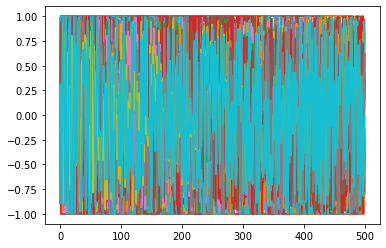

In [4]:
g = np.linspace(0.25, 2, 5)
kappa = np.linspace(0.25, 2, 5)

overlapStartValue = np.zeros((5,5))

overlapEndValue = np.zeros((5,5))

for j in range(len(kappa)):
    for i in range(len(g)):
        #run opt
        targetState2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,0], g[i], kappa[j])
        targetMPS2 = targetState2.get_mps([pulse.ConstantPulse(0)])
        state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [-1,1], g[i], kappa[j])
        delta2 = ppulse.DirectParameterizedPulse(20, 500, [-1, 1])
        plt.plot(delta2.state())
        optimize_overlap(state2, targetMPS2, delta2)
        plt.plot(delta2.state())
        
        #run precise overlap
        targetState2 = cavity_qed_systems.ModulatedTavisCumming(0.001, 20000, [0,0], g[i], kappa[j])
        targetMPS2 = targetState2.get_mps([pulse.ConstantPulse(0)])
        state2 = cavity_qed_systems.ModulatedTavisCumming(0.001, 20000, [-1,1], g[i], kappa[j])
        overlapStartValue[j,i] = (np.abs(state2.get_inner_product(targetMPS2, [pulse.ConstantPulse(0)]))**2)
        overlapEndValue[j,i] = (np.abs(state2.get_inner_product(targetMPS2, [delta2]))**2)
         

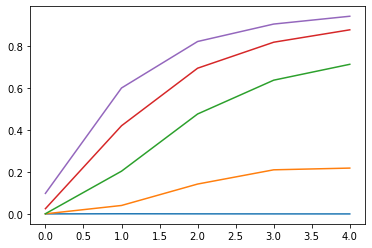

In [5]:
plt.plot(overlapStartValue)

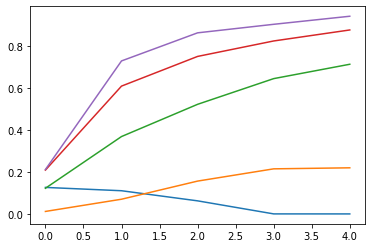

In [6]:
plt.plot(overlapEndValue)

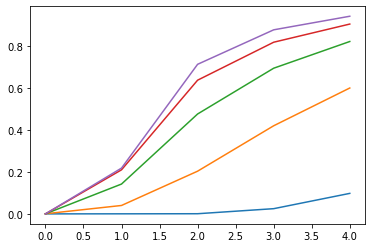

In [10]:
plt.plot(overlapStartValue.T)

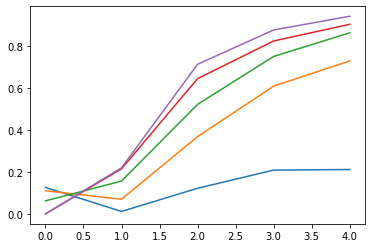

In [11]:
plt.plot(overlapEndValue.T)

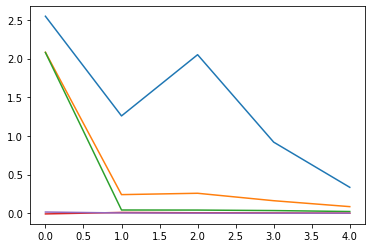

In [13]:
plt.plot(np.log10(overlapEndValue.T/overlapStartValue.T))